# Loan Sanction Amount Prediction

In [1]:
import numpy as np
import pandas as pd  

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
loan_data=pd.read_csv('data.csv')

In [4]:
loan_data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [5]:
loan_data.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [6]:
loan_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [7]:
loan_data.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [8]:
loan_data.describe().apply(lambda s:s.apply('{0:.5f}'.format))

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.00000,25424.00000,30000.00000,29828.00000,27507.00000,28297.00000,30000.00000,30000.00000,25150.00000,30000.00000,30000.00000,30000.00000,29660.00000
mean,40.09230,2630.57442,88826.33386,400.93688,2.25303,739.88538,0.19393,501.93470,2631.11944,2.46007,-4.74387,131759.68025,47649.34221
std,16.04513,11262.72383,59536.94960,242.54537,0.95116,72.16385,0.39538,288.15809,11322.67700,1.11856,74.61459,93549.54810,48221.14669
min,18.00000,377.70000,6048.24000,-999.00000,1.00000,580.00000,0.00000,1.00000,377.70000,1.00000,-999.00000,-999.00000,-999.00000
25%,25.00000,1650.45750,41177.75500,247.66750,2.00000,681.88000,0.00000,251.00000,1650.45000,1.00000,1.00000,60572.16000,0.00000
50%,40.00000,2222.43500,75128.07500,375.20500,2.00000,739.82000,0.00000,504.00000,2223.25000,2.00000,1.00000,109993.61000,35209.39500
75%,55.00000,3090.59250,119964.60500,521.29250,3.00000,799.12000,0.00000,751.00000,3091.40750,3.00000,1.00000,178880.72000,74261.25000
max,65.00000,1777460.21000,621497.82000,3840.88000,14.00000,896.26000,1.00000,999.00000,1777460.21000,4.00000,1.00000,1077966.73000,481907.32000


In [9]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30000.0,40.092300,16.045129,18.00,25.0000,40.000,55.0000,65.00
Income (USD),25424.0,2630.574417,11262.723830,377.70,1650.4575,2222.435,3090.5925,1777460.21
Loan Amount Request (USD),30000.0,88826.333855,59536.949605,6048.24,41177.7550,75128.075,119964.6050,621497.82
Current Loan Expenses (USD),29828.0,400.936876,242.545375,-999.00,247.6675,375.205,521.2925,3840.88
Dependents,27507.0,2.253027,0.951162,1.00,2.0000,2.000,3.0000,14.00
Credit Score,28297.0,739.885381,72.163846,580.00,681.8800,739.820,799.1200,896.26
No. of Defaults,30000.0,0.193933,0.395384,0.00,0.0000,0.000,0.0000,1.00
Property ID,30000.0,501.934700,288.158086,1.00,251.0000,504.000,751.0000,999.00
Property Age,25150.0,2631.119440,11322.677000,377.70,1650.4500,2223.250,3091.4075,1777460.21
Property Type,30000.0,2.460067,1.118562,1.00,1.0000,2.000,3.0000,4.00


In [10]:
any(loan_data['Current Loan Expenses (USD)'] < 0)

True

In [11]:
exp_med = loan_data.loc[:,"Current Loan Expenses (USD)"].median()
loan_data.loc[:, 'Current Loan Expenses (USD)'].replace([-999, -2, -3], [exp_med, exp_med, exp_med], inplace=True)
any(loan_data['Current Loan Expenses (USD)'] < 0)

False

In [12]:
any(loan_data['Co-Applicant'] < 0)

True

In [13]:
exp_med = loan_data.loc[:,"Co-Applicant"].median()
loan_data.loc[:, 'Co-Applicant'].replace([-999, -4.66, -3], [exp_med, exp_med, exp_med], inplace=True)
any(loan_data['Co-Applicant'] < 0)

False

In [14]:
exp_med = loan_data.loc[:,"Property Price"].median()
loan_data.loc[:, 'Property Price'].replace([-999, -4.66, -3], [exp_med, exp_med, exp_med], inplace=True)

In [15]:
exp_med = loan_data.loc[:,"Loan Sanction Amount (USD)"].median()
loan_data.loc[:, 'Loan Sanction Amount (USD)'].replace([-999, -4.66, -3], [exp_med, exp_med, exp_med], inplace=True)

In [16]:
all_columns=loan_data.columns
for i in all_columns:
    if loan_data[i].dtype=='O':
        print(i + " : ",loan_data[i].unique())
        print("\n")

Customer ID :  ['C-36995' 'C-33999' 'C-3770' ... 'C-5192' 'C-12172' 'C-33003']


Name :  ['Frederica Shealy' 'America Calderone' 'Rosetta Verne' ... 'Carmelo Lone'
 'Carolann Osby' 'Bridget Garibaldi']


Gender :  ['F' 'M' nan]


Income Stability :  ['Low' 'High' nan]


Profession :  ['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']


Type of Employment :  ['Sales staff' nan 'High skill tech staff' 'Secretaries' 'Laborers'
 'Managers' 'Cooking staff' 'Core staff' 'Drivers' 'Realty agents'
 'Security staff' 'Accountants' 'Private service staff'
 'Waiters/barmen staff' 'Medicine staff' 'Cleaning staff'
 'Low-skill Laborers' 'HR staff' 'IT staff']


Location :  ['Semi-Urban' 'Rural' 'Urban']


Expense Type 1 :  ['N' 'Y']


Expense Type 2 :  ['N' 'Y']


Has Active Credit Card :  [nan 'Unpossessed' 'Active' 'Inactive']


Property Location :  ['Rural' 'Urban' 'Semi-Urban' nan]




<AxesSubplot:>

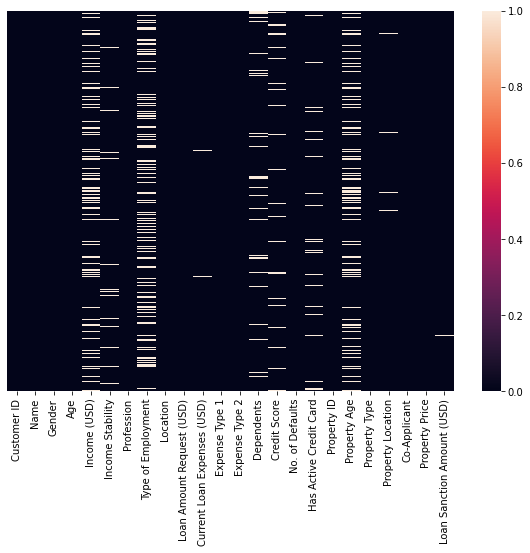

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(loan_data.isnull(),yticklabels=False,cbar='false')

<AxesSubplot:>

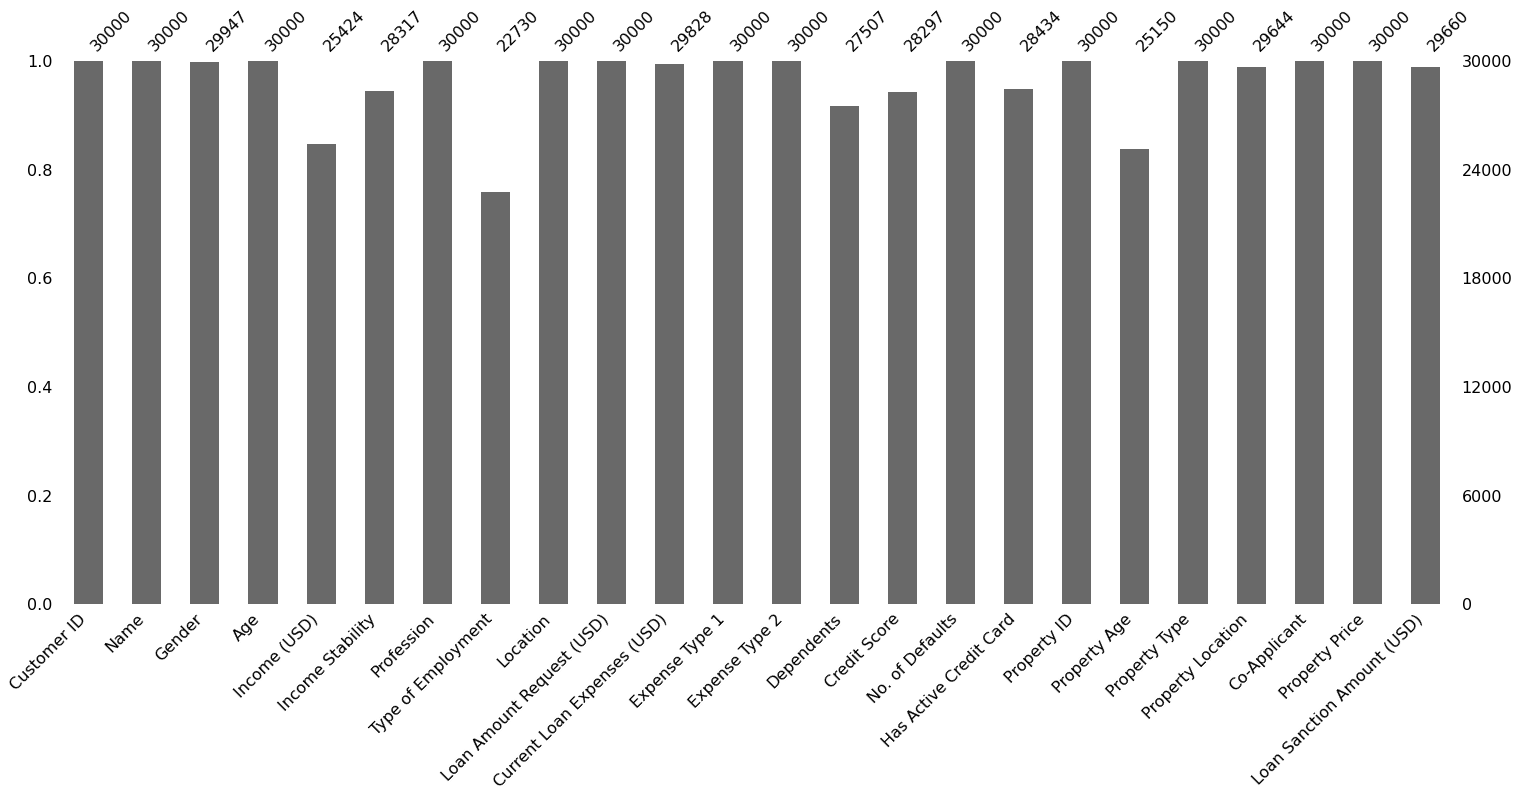

In [18]:
import missingno as msno
msno.bar(loan_data)

In [122]:
- **This barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon.**

SyntaxError: invalid syntax (Temp/ipykernel_7248/2817882534.py, line 1)

<AxesSubplot:>

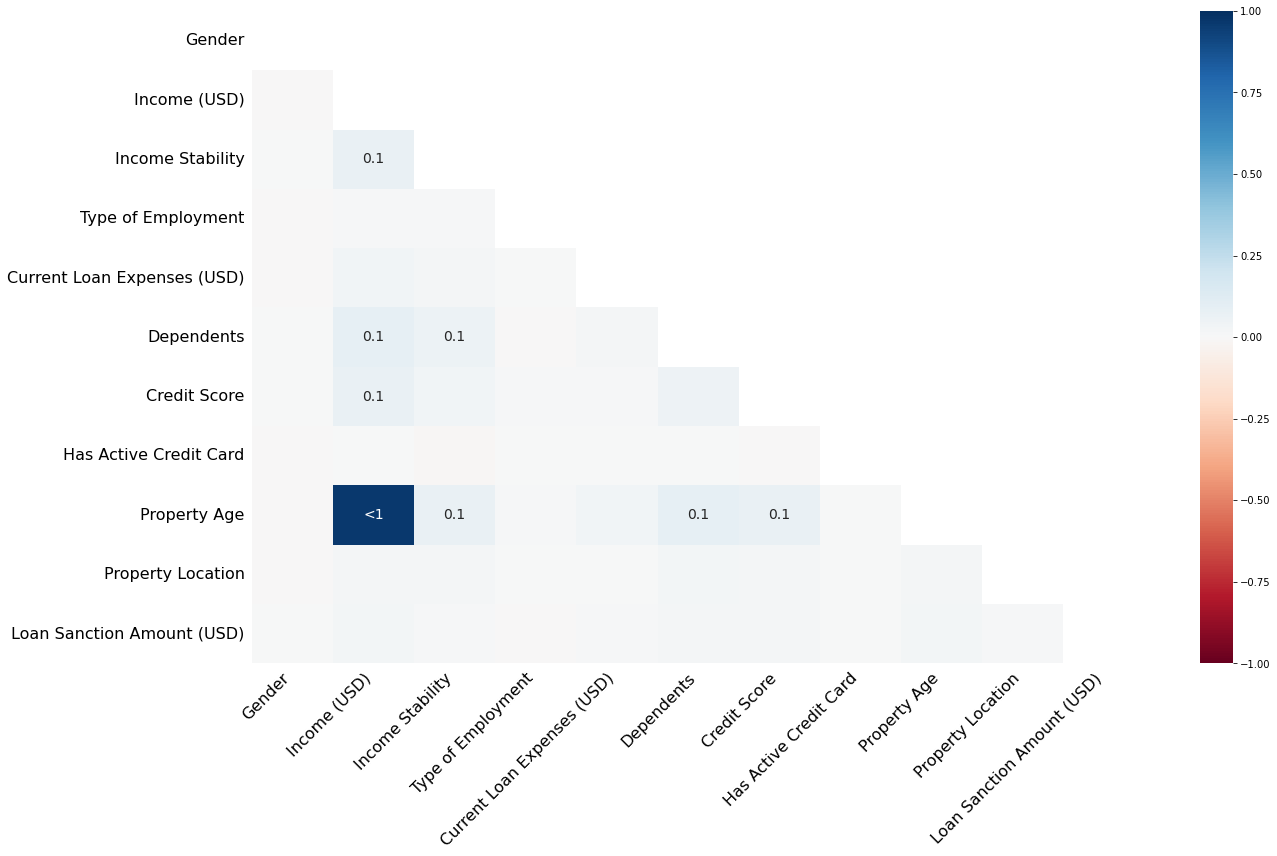

In [19]:
msno.heatmap(loan_data)

- **This heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.**


- **Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.**

<AxesSubplot:>

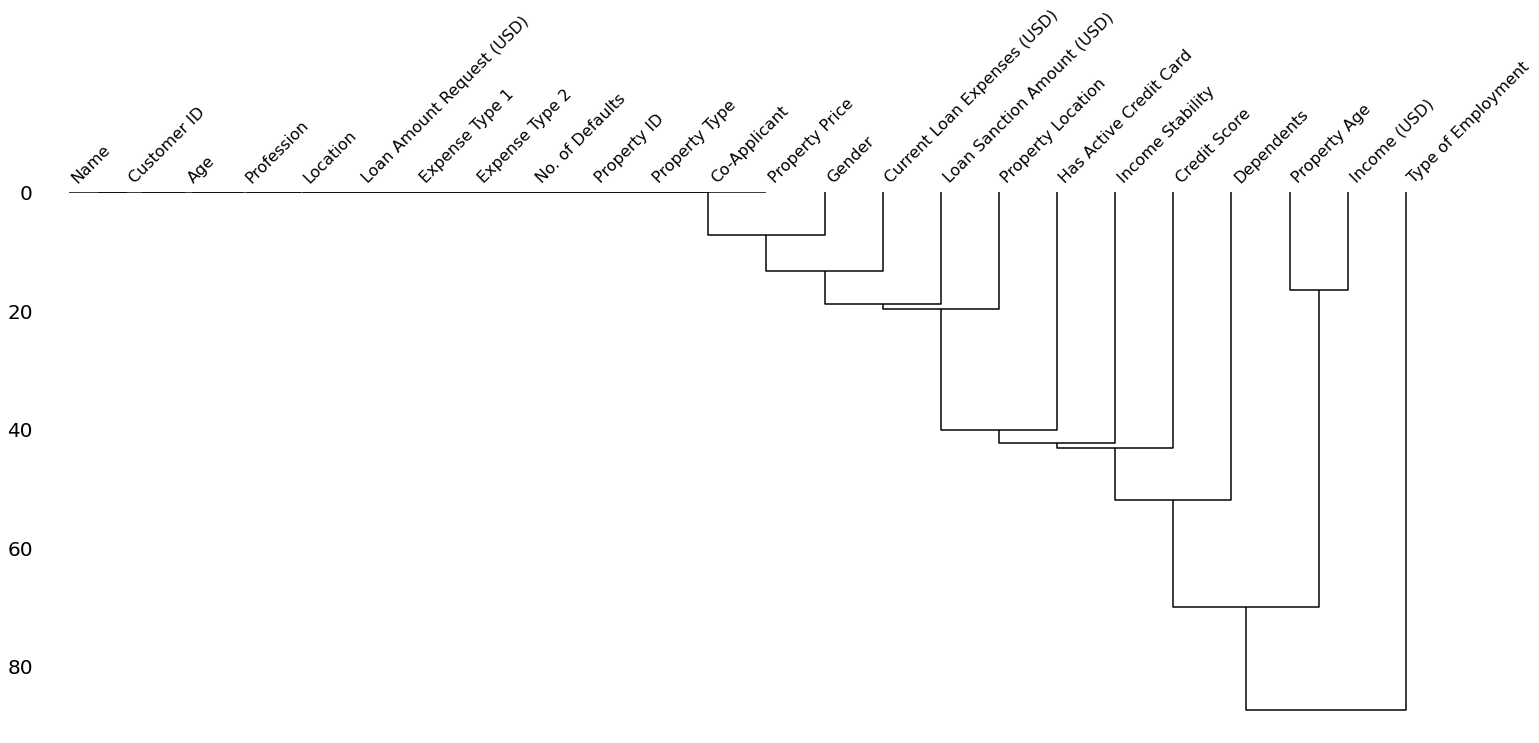

In [20]:
msno.dendrogram(loan_data)

- **The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.**

- **If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.**

## Handling Null Values

In [21]:
print("Maximum value across the index: ",loan_data['Gender'].value_counts().idxmax())
print("Mode: ",loan_data['Gender'].mode()[0])
print("Value Counts:\n",loan_data['Gender'].value_counts())

Maximum value across the index:  M
Mode:  M
Value Counts:
 M    15053
F    14894
Name: Gender, dtype: int64


In [22]:
loan_data['Gender']=loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])

In [23]:
print('Number of null values in "Gender" column is: ',loan_data['Gender'].isnull().sum())

Number of null values in "Gender" column is:  0


#### Checking for outlier values

In [24]:
Q1 = loan_data['Income (USD)'].quantile(0.25)
Q3 = loan_data['Income (USD)'].quantile(0.75)
IQR = Q3 - Q1

In [25]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -509.74500000000035
up_limit is 5250.795


In [26]:
outlier = []
for x in loan_data['Income (USD)']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print("Number of outliers in dataset: ",len(outlier))
print("Percentage of outliers :",1124/25424*100,"%")

Number of outliers in dataset:  1124
Percentage of outliers : 4.4210195091252364 %


#### "Income (USD)" has 4.42% outliers, better to replace null values with median

In [27]:
loan_data['Income (USD)']=loan_data['Income (USD)'].fillna(loan_data['Income (USD)'].median())

In [28]:
print('Number of null values in "Income (USD)" column is: ',loan_data['Income (USD)'].isnull().sum())

Number of null values in "Income (USD)" column is:  0


In [29]:
loan_data['Income Stability'].value_counts()

Low     25751
High     2566
Name: Income Stability, dtype: int64

<AxesSubplot:xlabel='Income Stability', ylabel='count'>

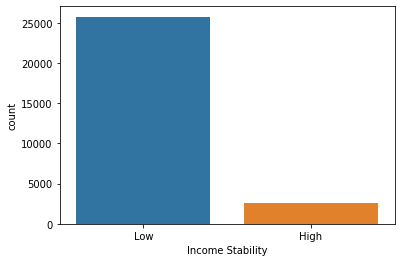

In [30]:
sns.countplot(x='Income Stability',data=loan_data)

In [31]:
print("Maximum value across the index: ",loan_data['Income Stability'].value_counts().idxmax())
print("Mode :",loan_data['Income Stability'].mode()[0])

Maximum value across the index:  Low
Mode : Low


In [32]:
loan_data['Income Stability'] = loan_data['Income Stability'].fillna(loan_data['Income Stability'].mode()[0]) 

In [33]:
print('Number of null values in "Income Stability" column: ',loan_data['Income Stability'].isnull().sum() )

Number of null values in "Income Stability" column:  0


In [34]:
loan_data['Type of Employment'].value_counts()

Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: Type of Employment, dtype: int64

<AxesSubplot:xlabel='Type of Employment', ylabel='count'>

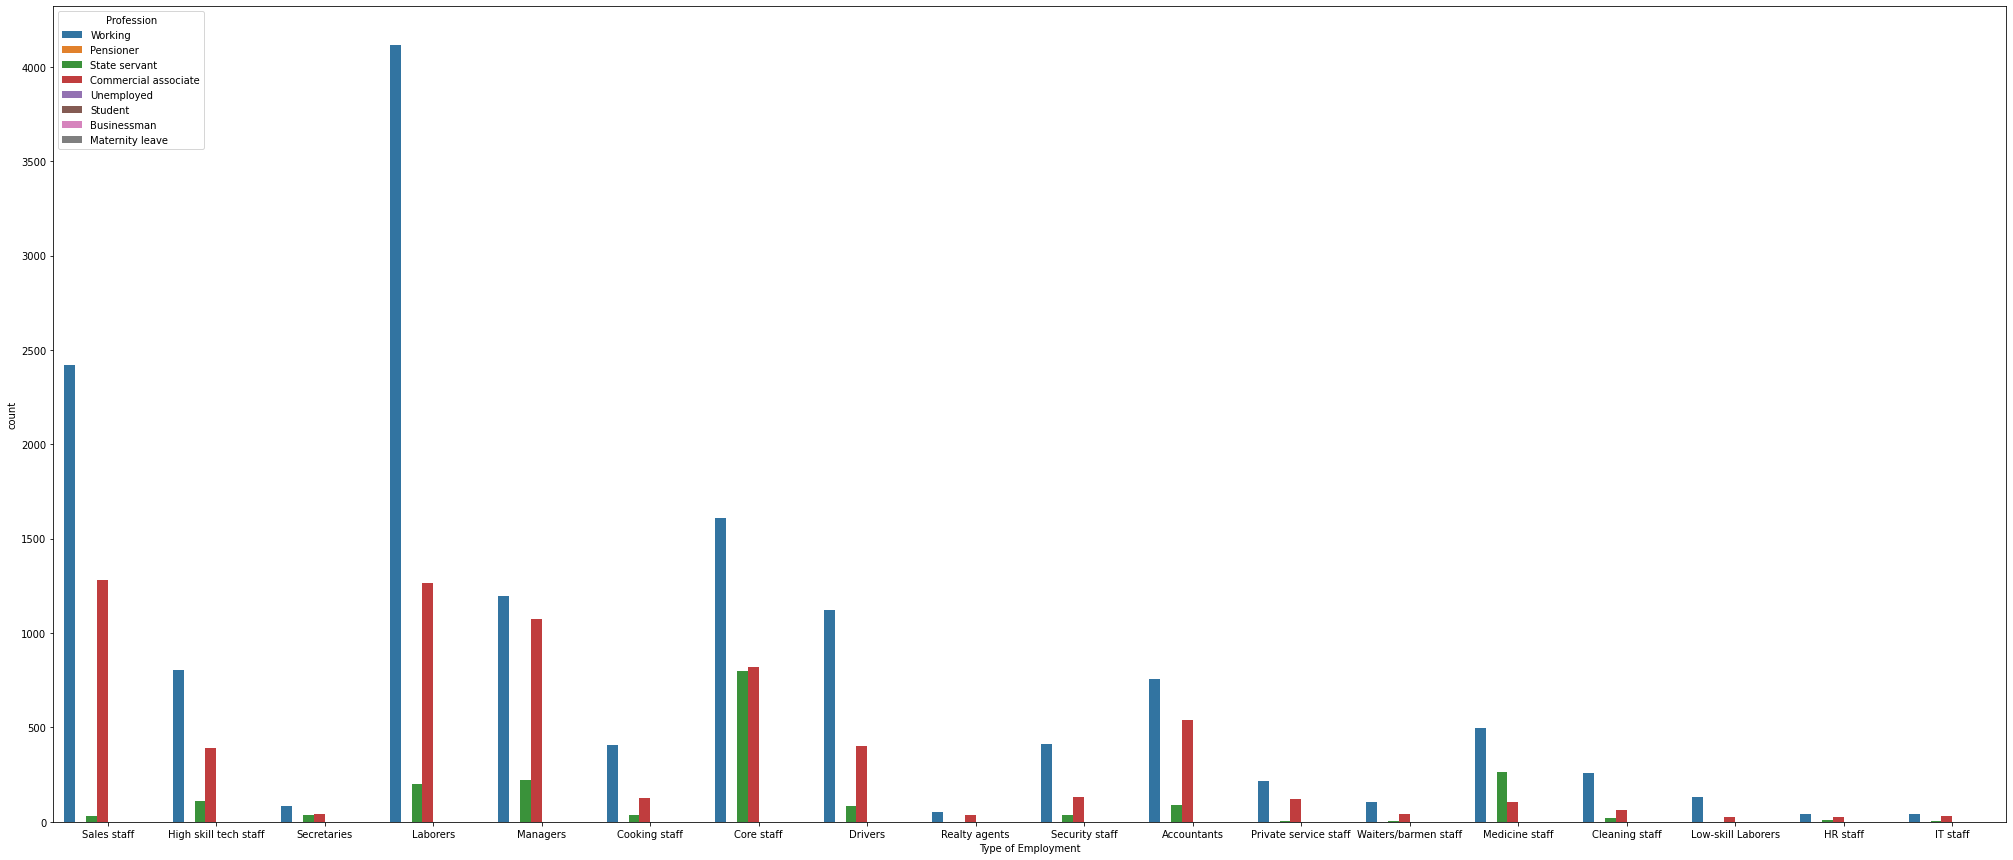

In [35]:
plt.figure(figsize=(35,15))
sns.countplot(x='Type of Employment',data=loan_data,hue='Profession')

In [36]:
print("maximum value across the index: ",loan_data['Type of Employment'].value_counts().idxmax())
print("Mode: ",loan_data['Type of Employment'].mode() [0] )

maximum value across the index:  Laborers
Mode:  Laborers


In [37]:
loan_data['Type of Employment'] = loan_data['Type of Employment'].fillna(loan_data['Type of Employment'].mode()[0]) 

In [38]:
print('Number of null values in "Type of Employment" column: ',loan_data['Type of Employment'].isnull().sum())

Number of null values in "Type of Employment" column:  0


<AxesSubplot:xlabel='Gender', ylabel='Current Loan Expenses (USD)'>

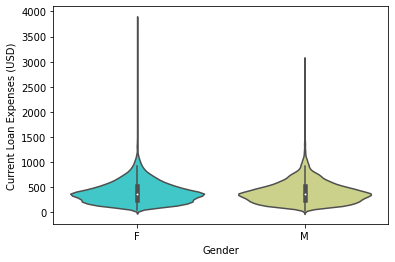

In [39]:
sns.violinplot(x='Gender',y='Current Loan Expenses (USD)',data=loan_data,palette="rainbow")  

<AxesSubplot:xlabel='Profession', ylabel='Current Loan Expenses (USD)'>

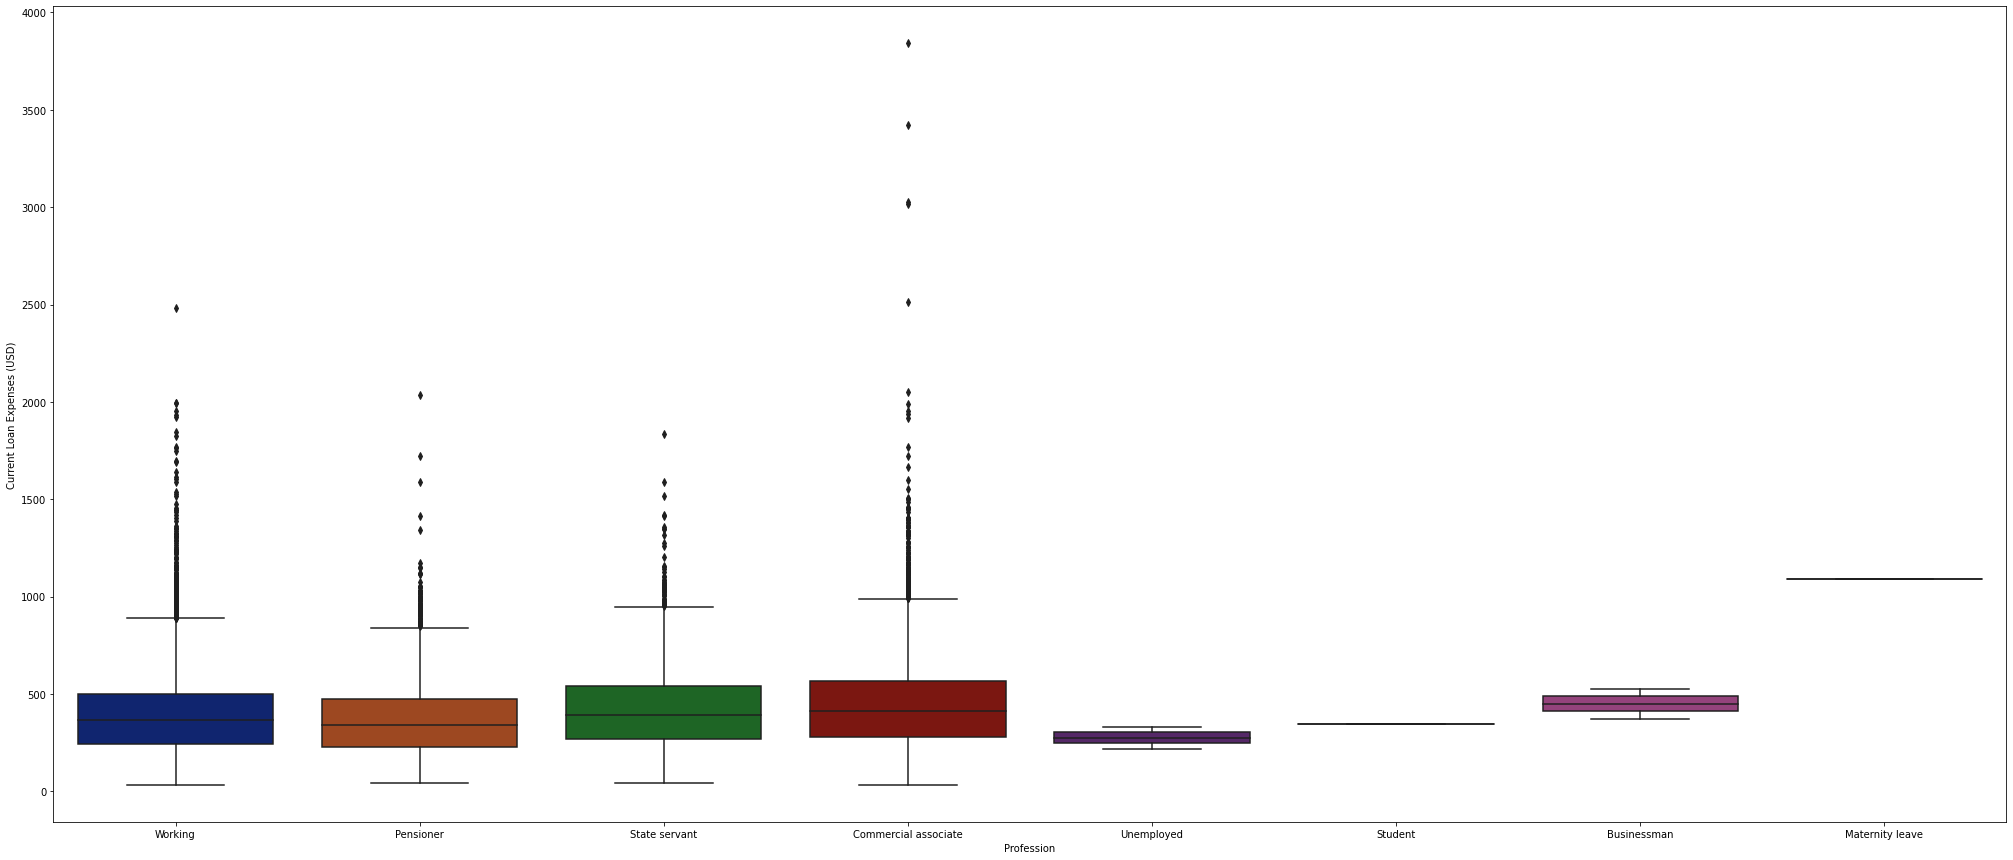

In [40]:
plt.figure(figsize=(35,15))
sns.boxplot(x='Profession',y='Current Loan Expenses (USD)',data=loan_data,palette='dark')  

<AxesSubplot:xlabel='Income Stability', ylabel='Current Loan Expenses (USD)'>

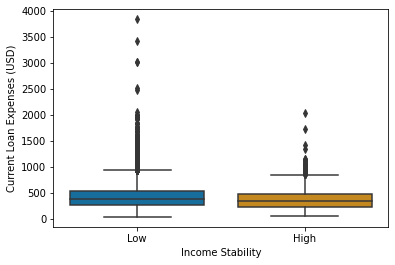

In [41]:
sns.boxplot(x='Income Stability',y='Current Loan Expenses (USD)',data=loan_data,palette='colorblind')  

<AxesSubplot:xlabel='Location', ylabel='Current Loan Expenses (USD)'>

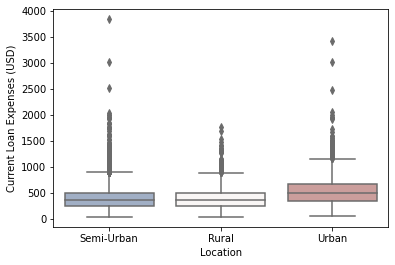

In [42]:
sns.boxplot(x='Location',y='Current Loan Expenses (USD)',data=loan_data,palette='vlag')  

<AxesSubplot:xlabel='Expense Type 1', ylabel='Current Loan Expenses (USD)'>

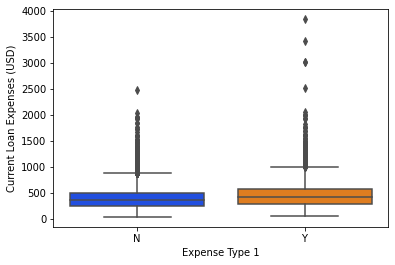

In [43]:
sns.boxplot(x='Expense Type 1',y='Current Loan Expenses (USD)',data=loan_data,palette='bright')  

#### Checking for outliers

In [44]:
Q1 = loan_data['Current Loan Expenses (USD)'].quantile(0.25)
Q3 = loan_data['Current Loan Expenses (USD)'].quantile(0.75)
IQR = Q3 - Q1

In [45]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -153.73875000000007
up_limit is 926.3112500000001


In [46]:
outlier = []
for x in loan_data['Current Loan Expenses (USD)']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Number of outlier in the dataset is: ', len(outlier))
print('Percentage of outliers: ',857/29828*100,"%")

Number of outlier in the dataset is:  702
Percentage of outliers:  2.8731393321711143 %


#### Replacing Null values with median

In [47]:
loan_data['Current Loan Expenses (USD)']=loan_data['Current Loan Expenses (USD)'].fillna(loan_data['Current Loan Expenses (USD)'].median())

In [48]:
print('Number of null values in "Current Loan Expenses (USD)" column: ',loan_data['Current Loan Expenses (USD)'].isnull().sum()  )

Number of null values in "Current Loan Expenses (USD)" column:  0


<AxesSubplot:xlabel='Dependents', ylabel='count'>

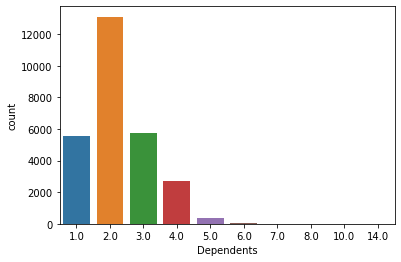

In [49]:
sns.countplot(x='Dependents',data=loan_data)

In [50]:
print("Maximum value across the index: ",loan_data['Dependents'].value_counts().idxmax())
print("Mode: ",loan_data['Dependents'].mode()[0])

Maximum value across the index:  2.0
Mode:  2.0


In [51]:
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0]) 

In [52]:
print('Number of null values in "Dependents" column: ',loan_data['Dependents'].isnull().sum())

Number of null values in "Dependents" column:  0


c:\users\srishti kumari\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

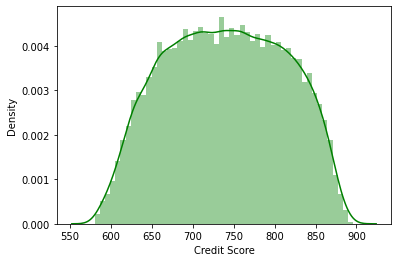

In [53]:
sns.distplot(loan_data['Credit Score'],bins=50,color='green')

<AxesSubplot:xlabel='Income Stability', ylabel='Credit Score'>

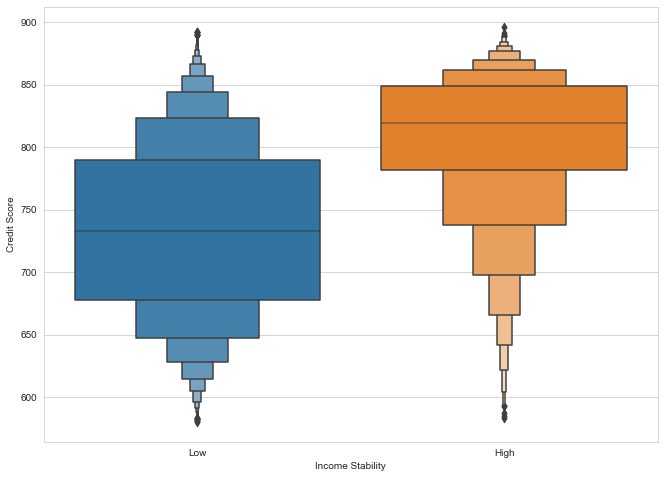

In [54]:
plt.figure(figsize=(11,8))
sns.set_style('whitegrid')
sns.boxenplot(x='Income Stability',y='Credit Score',data=loan_data)

In [55]:
def impute_credit_score(cols):
    Credit_Score = cols[0]
    Income_Stability = cols[1]
    
    if pd.isnull(Credit_Score):

        if Income_Stability == 'Low':
            return 735

        else:
            return 820

    else:
        return Credit_Score

In [56]:
loan_data['Credit Score'] = loan_data[['Credit Score','Income Stability']].apply(impute_credit_score,axis=1)

In [57]:
print('Number of null values in "Credit Score" column: ',loan_data['Credit Score'].isnull().sum())

Number of null values in "Credit Score" column:  0


In [58]:
loan_data['Has Active Credit Card'].value_counts()  

Active         9771
Inactive       9466
Unpossessed    9197
Name: Has Active Credit Card, dtype: int64

In [59]:
print("Maximum value across the index: ",loan_data['Has Active Credit Card'].value_counts().idxmax()  )
print("Mode: ",loan_data['Has Active Credit Card'].mode()[0])

Maximum value across the index:  Active
Mode:  Active


In [60]:
loan_data['Has Active Credit Card']=loan_data['Has Active Credit Card'].fillna(loan_data['Has Active Credit Card'].mode()[0])

In [61]:
print('Number of null values in "Has Active Credit Card" column: ',loan_data['Has Active Credit Card'].isnull().sum())

Number of null values in "Has Active Credit Card" column:  0


In [62]:
loan_data['Has Active Credit Card']=loan_data['Has Active Credit Card'].fillna(loan_data['Has Active Credit Card'].mode()[0])

In [63]:
print('Number of null values in "Has Active Credit Card" column: ',loan_data['Has Active Credit Card'].isnull().sum())

Number of null values in "Has Active Credit Card" column:  0


In [64]:
loan_data['Property Location'].value_counts()

Semi-Urban    10387
Rural         10041
Urban          9216
Name: Property Location, dtype: int64

In [65]:
print("Maximum value across the index: ",loan_data['Property Location'].value_counts().idxmax())
print("Mode: ",loan_data['Property Location'].mode()[0])

Maximum value across the index:  Semi-Urban
Mode:  Semi-Urban


In [66]:
loan_data['Property Location']=loan_data['Property Location'].fillna(loan_data['Property Location'].mode()[0])

In [67]:
print('Number of null values in "Property Location" column: ',loan_data['Property Location'].isnull().sum())

Number of null values in "Property Location" column:  0


In [68]:
loan_data.isnull().sum()

Customer ID                       0
Name                              0
Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [69]:
loan_data.drop('Property Age',axis=1,inplace=True)

In [70]:
loan_data.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

In [71]:
loan_data['Loan Sanction Amount (USD)'].isnull().sum()

340

In [72]:
loan_data.dropna(inplace=True)

In [73]:
loan_data['Loan Sanction Amount (USD)'].isnull().sum()  

0

In [74]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29660 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  29660 non-null  object 
 1   Name                         29660 non-null  object 
 2   Gender                       29660 non-null  object 
 3   Age                          29660 non-null  int64  
 4   Income (USD)                 29660 non-null  float64
 5   Income Stability             29660 non-null  object 
 6   Profession                   29660 non-null  object 
 7   Type of Employment           29660 non-null  object 
 8   Location                     29660 non-null  object 
 9   Loan Amount Request (USD)    29660 non-null  float64
 10  Current Loan Expenses (USD)  29660 non-null  float64
 11  Expense Type 1               29660 non-null  object 
 12  Expense Type 2               29660 non-null  object 
 13  Dependents      

## EDA

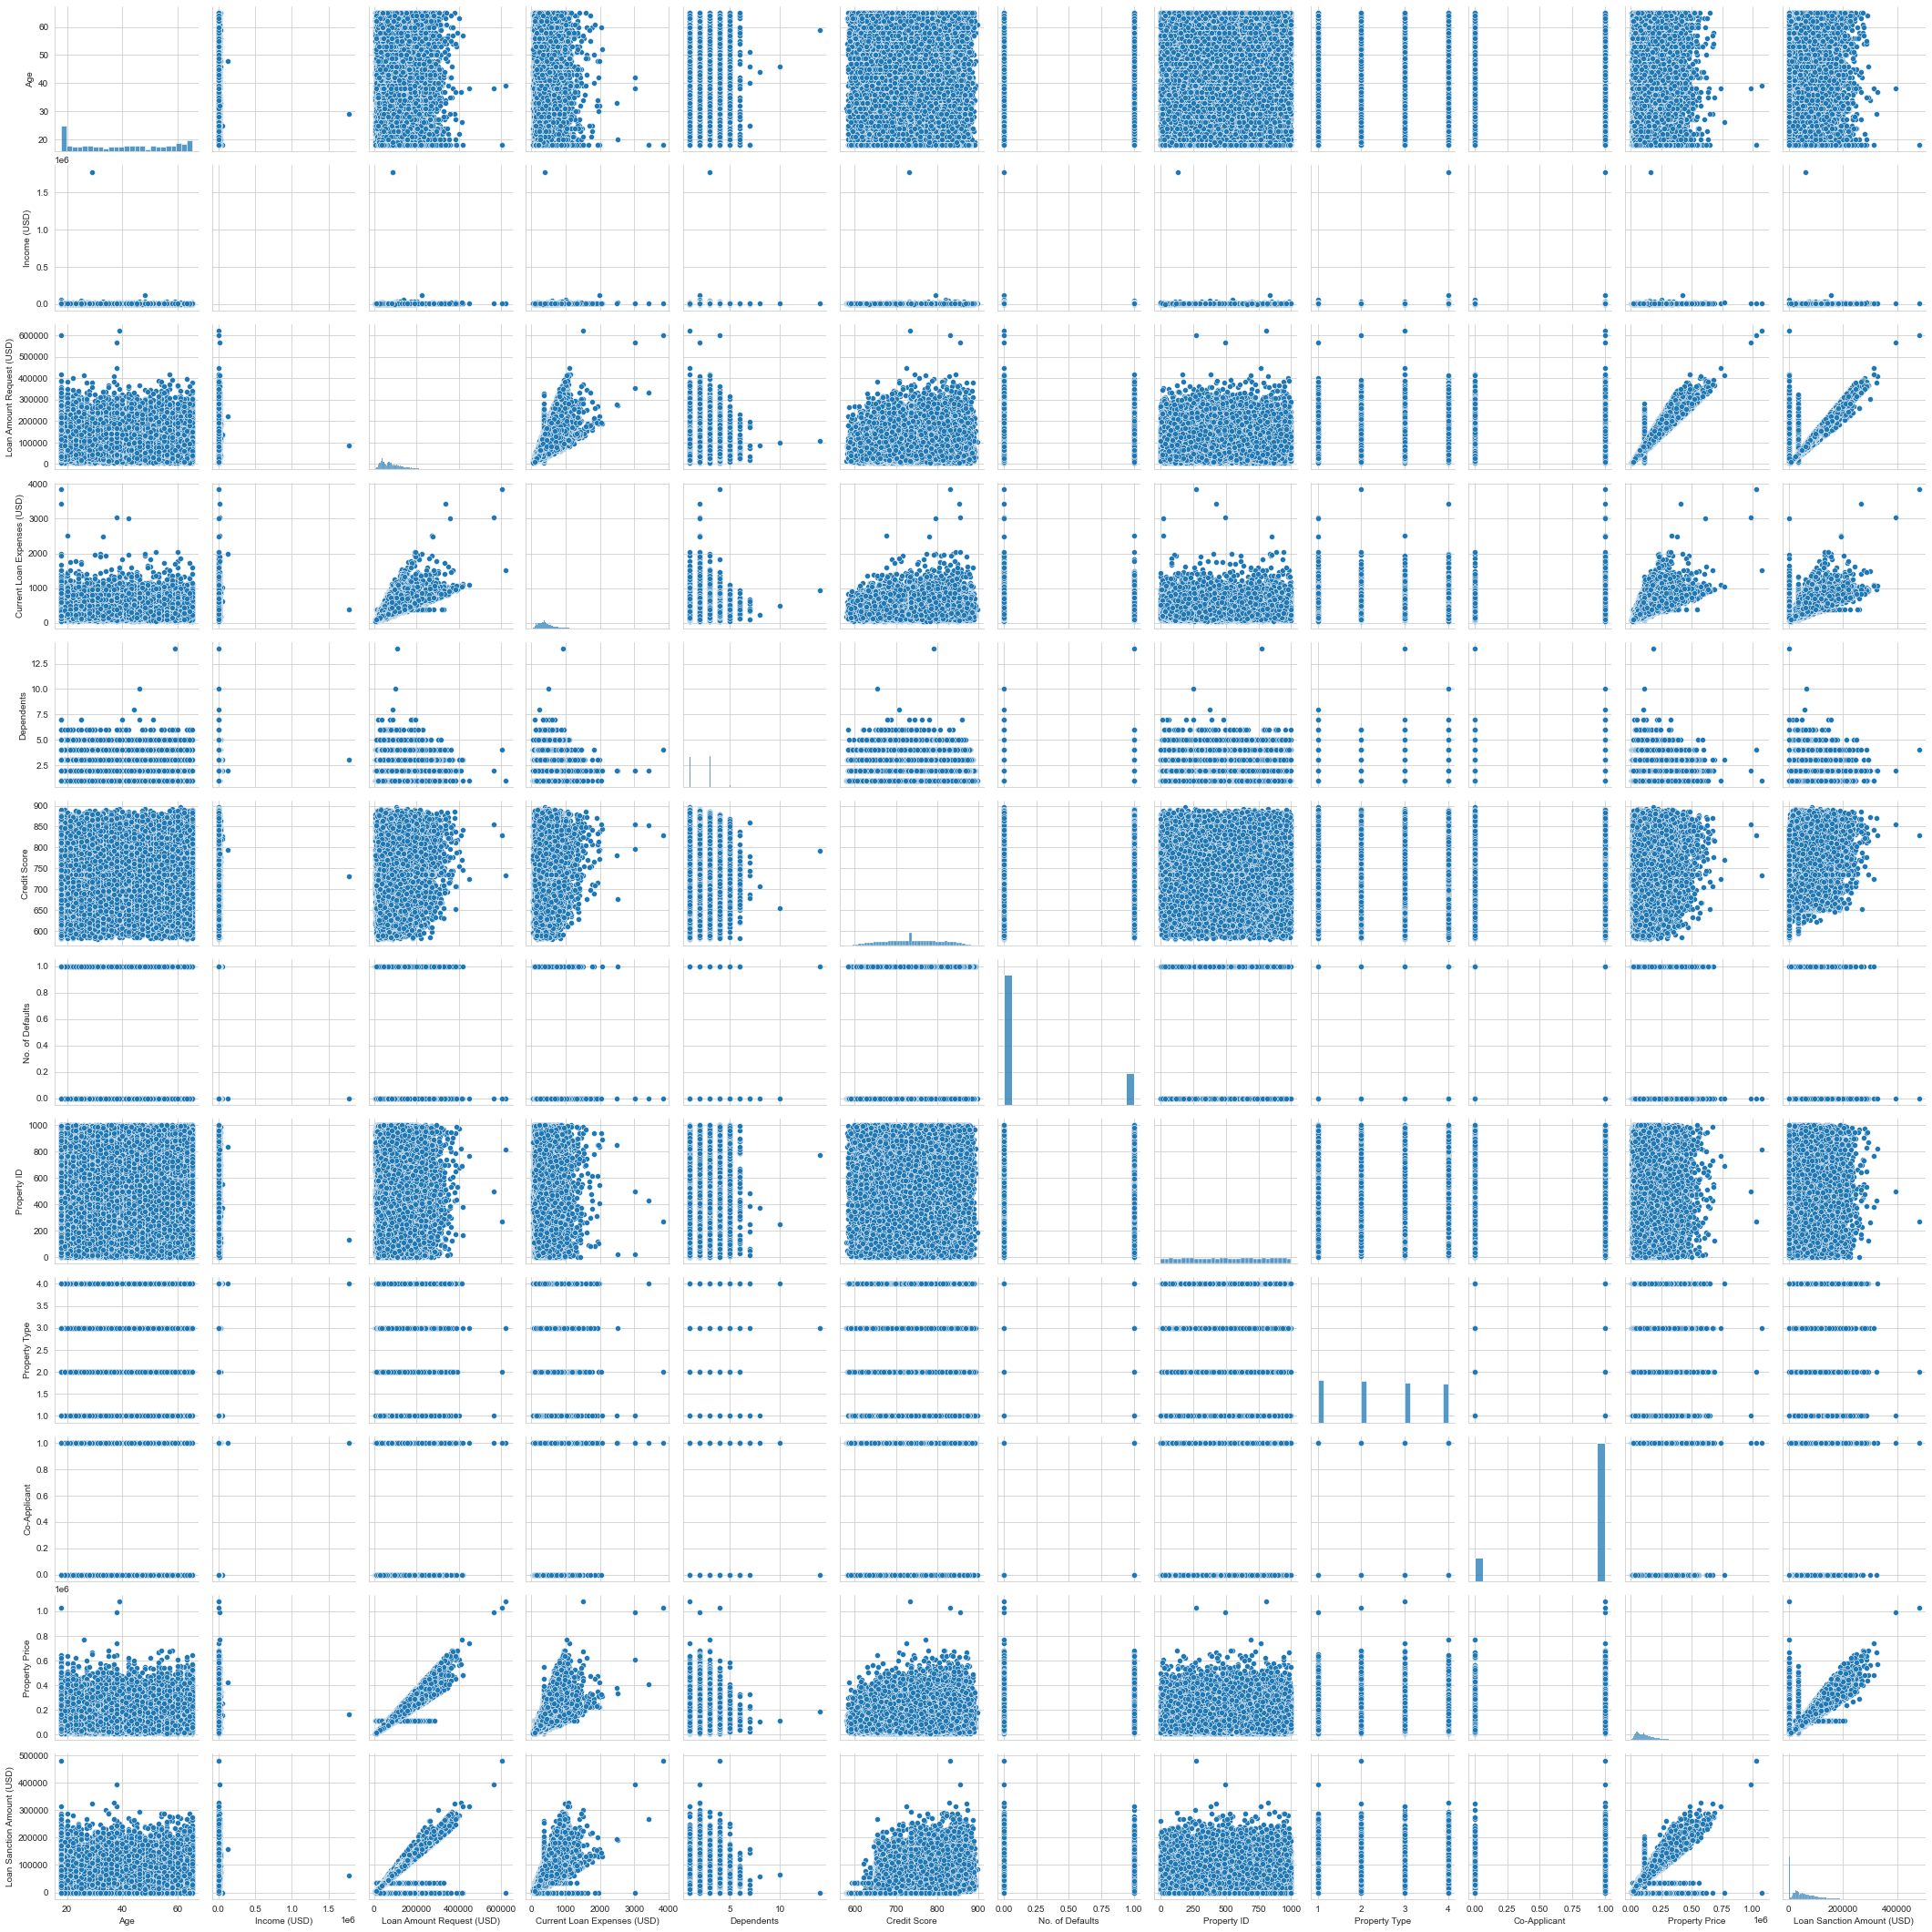

In [75]:
sns.pairplot(loan_data)

<AxesSubplot:xlabel='Age', ylabel='Loan Sanction Amount (USD)'>

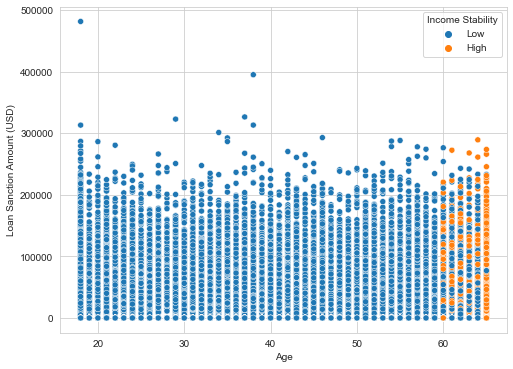

In [76]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Loan Sanction Amount (USD)',data=loan_data,hue='Income Stability')

<AxesSubplot:xlabel='Loan Amount Request (USD)', ylabel='Loan Sanction Amount (USD)'>

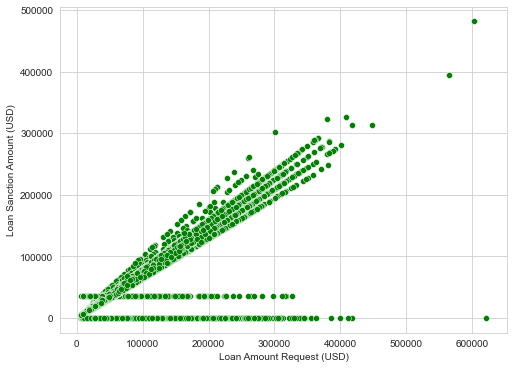

In [77]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Loan Amount Request (USD)',y='Loan Sanction Amount (USD)',data=loan_data,color='green')

<AxesSubplot:xlabel='Current Loan Expenses (USD)', ylabel='Loan Sanction Amount (USD)'>

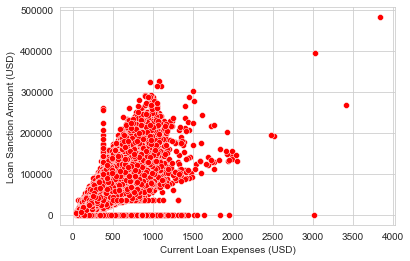

In [78]:
sns.scatterplot(x='Current Loan Expenses (USD)',y='Loan Sanction Amount (USD)',data=loan_data,color='red')

<AxesSubplot:xlabel='Dependents', ylabel='Loan Sanction Amount (USD)'>

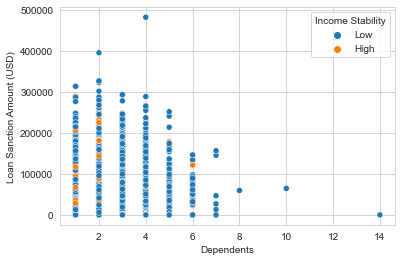

In [79]:
sns.scatterplot(x='Dependents',y='Loan Sanction Amount (USD)',data=loan_data,hue='Income Stability')  

<AxesSubplot:xlabel='Property Price', ylabel='Loan Sanction Amount (USD)'>

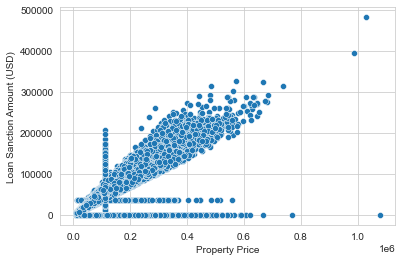

In [80]:
sns.scatterplot(x='Property Price',y='Loan Sanction Amount (USD)',data=loan_data)

<AxesSubplot:>

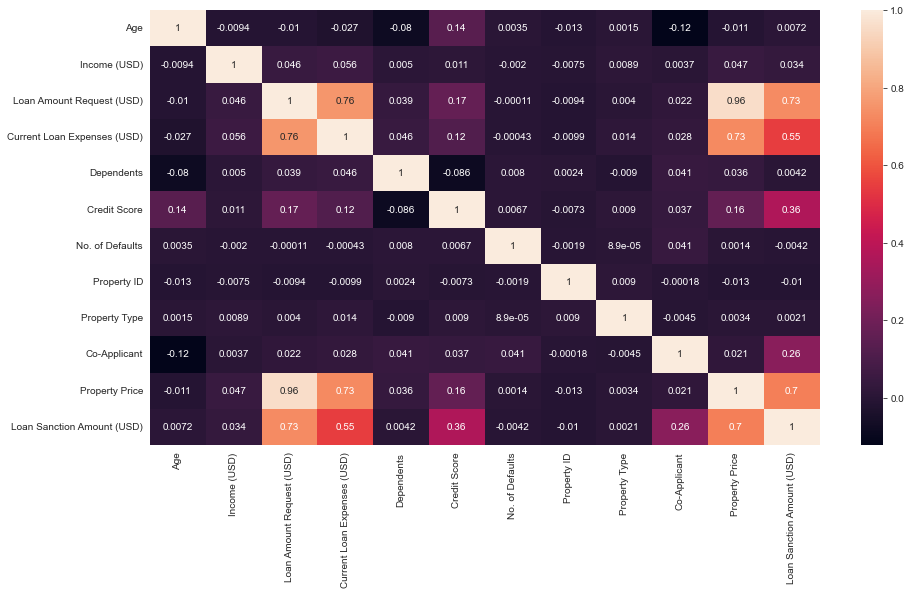

In [81]:
plt.figure(figsize=(15,8))
sns.heatmap(loan_data.corr(),annot=True)

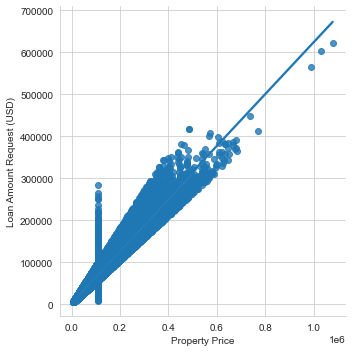

In [82]:
sns.lmplot(x='Property Price',y='Loan Amount Request (USD)',data=loan_data)

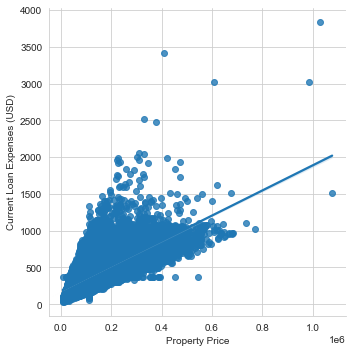

In [83]:
sns.lmplot(x='Property Price',y='Current Loan Expenses (USD)',data=loan_data)

c:\users\srishti kumari\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Density'>

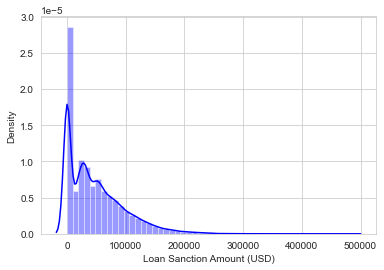

In [84]:
sns.distplot(loan_data['Loan Sanction Amount (USD)'],color='blue')

In [85]:
loan_data.drop(['Customer ID','Name','Property ID'],axis=1,inplace=True)

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
category= ['Gender','Income Stability','Profession','Type of Employment','Location','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location'] 

In [88]:
encoder= LabelEncoder()
for i in category:
    loan_data[i]=encoder.fit_transform(loan_data[i])
    loan_data.dtypes

In [89]:
loan_data.dtypes

Gender                           int32
Age                              int64
Income (USD)                   float64
Income Stability                 int32
Profession                       int32
Type of Employment               int32
Location                         int32
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                   int32
Expense Type 2                   int32
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card           int32
Property Type                    int64
Property Location                int32
Co-Applicant                   float64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

In [90]:
X=loan_data.drop('Loan Sanction Amount (USD)',axis=1)  

In [91]:
y=loan_data['Loan Sanction Amount (USD)']

#### Train Test Split

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=46)

In [94]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def train(model, X, Y):
    #train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size = 0.25)
    model.fit(x_train, y_train)
    
    #predict the results
    pred = model.predict(x_test)
    
    #cross validation
    cv_score = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    r2 = r2_score(y_test, pred)
    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:",np.sqrt(cv_score))
    print("R2_score:",r2)

## Linear Regression

Results
MSE: 28672.095407672066
CV Score: 28549.375720614735
R2_score: 0.6340661430563199


<AxesSubplot:title={'center':'Model Coefficients'}>

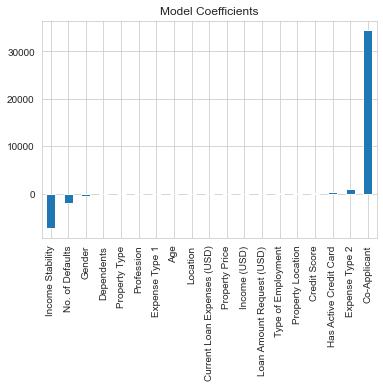

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

## Random forest Regression

In [96]:
from sklearn.ensemble import RandomForestRegressor


In [97]:
rfr_model=RandomForestRegressor()

In [98]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
Predict4=rfr_model.predict(X_test)

<AxesSubplot:xlabel='Loan Sanction Amount (USD)'>

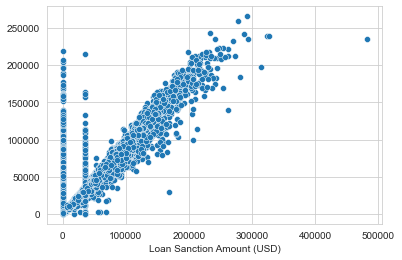

In [100]:
sns.scatterplot(x=y_test,y=Predict4) 

In [101]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, Predict4))
print('MSE:', metrics.mean_squared_error(y_test, Predict4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predict4))) 
print('r2_score: ',r2_score(y_test,Predict4)) 

MAE: 11302.55557522477
MSE: 525868737.4568165
RMSE: 22931.828044375714
r2_score:  0.7761139522957408


## Extra Trees Regression

Results
MSE: 23666.88482441772
CV Score: 22967.913401017155
R2_score: 0.7506749461728636


<AxesSubplot:title={'center':'Feature Importance'}>

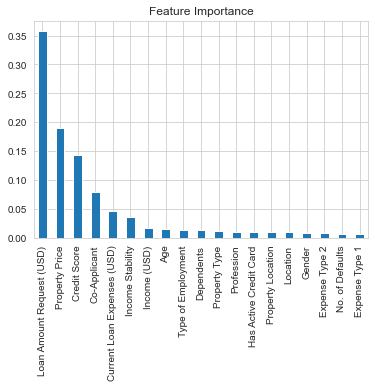

In [102]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(n_jobs = -1)
train(model, X,y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind ='bar', title = 'Feature Importance')

## Gradient Boosting Regression

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
params = {'n_estimators': 490,
          'max_depth': 6,
          'min_samples_split': 6,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [105]:
gbr_model=GradientBoostingRegressor(**params)

In [106]:
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6, min_samples_split=6,
                          n_estimators=490)

In [107]:
Predict5=gbr_model.predict(X_test)

<AxesSubplot:xlabel='Loan Sanction Amount (USD)'>

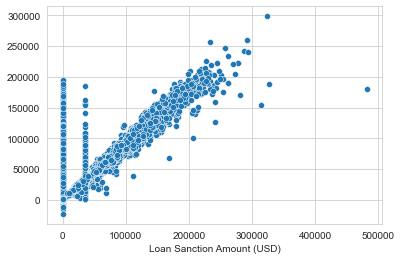

In [108]:
sns.scatterplot(x=y_test,y=Predict5)  

c:\users\srishti kumari\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Density'>

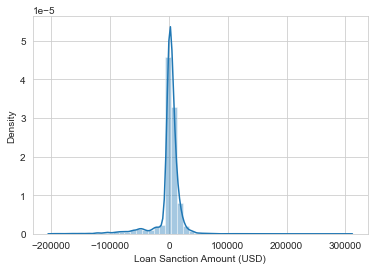

In [109]:
sns.distplot((y_test-Predict5),bins=50) 

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, Predict5))
print('MSE:', metrics.mean_squared_error(y_test, Predict5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predict5)))  
print('r2_score: ',r2_score(y_test,Predict5)) 

MAE: 10973.89058897213
MSE: 503385611.84854907
RMSE: 22436.256636269543
r2_score:  0.7856860332618331


## XGBoost Regression

In [111]:
from xgboost import XGBRegressor

In [112]:
xgb_model=XGBRegressor(n_estimators=70, learning_rate=0.08, gamma=0.1, subsample=1 ,colsample_bytree=1 , max_depth=7)

In [113]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=70, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
Predict7=xgb_model.predict(X_test)

<AxesSubplot:xlabel='Loan Sanction Amount (USD)'>

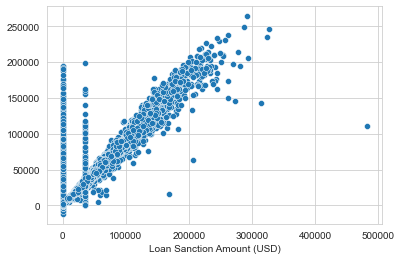

In [115]:
sns.scatterplot(x=y_test,y=Predict7)  

c:\users\srishti kumari\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Density'>

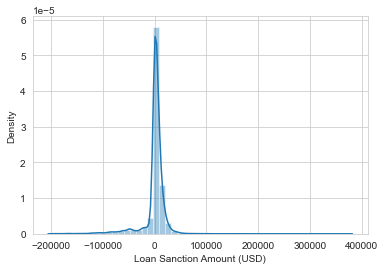

In [116]:
sns.distplot((y_test-Predict7),bins=50) 

In [117]:
print('MAE:', metrics.mean_absolute_error(y_test, Predict7))
print('MSE:', metrics.mean_squared_error(y_test, Predict7))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Predict7)))  
print('r2_score: ',r2_score(y_test,Predict7)) 

MAE: 10788.830428538233
MSE: 512452153.99627495
RMSE: 22637.40607923697
r2_score:  0.7818259972048976


## Stochastic Gradient Descent

In [118]:
from sklearn.linear_model import SGDRegressor 

In [119]:
from sklearn.pipeline import make_pipeline

In [120]:
from sklearn.preprocessing import StandardScaler 

In [121]:
n_samples, n_features = 10, 5
reg1 = make_pipeline(StandardScaler(),SGDRegressor(max_iter=5000, tol=1e-3))

train(model, X, y)

Results
MSE: 23621.576347193186
CV Score: 22999.6401594824
R2_score: 0.7516286606493047
